In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, [2, 4, 5, 6, 7, 11]].values
y = dataset.iloc[:, 1].values


In [4]:
sex_pivot = dataset.pivot_table(index='Sex', values='Survived')

In [5]:
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
pclass_pivot = dataset.pivot_table(index='Pclass', values='Survived')

In [10]:
pclass_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
dataset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
dataset[dataset["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [14]:
survived = dataset[dataset["Survived"] == 1]
died = dataset[dataset["Survived"] == 0]

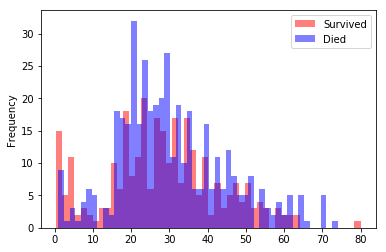

In [15]:
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

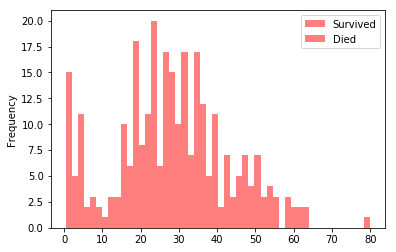

In [16]:
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
# died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [18]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
pivot = dataset.pivot_table(index='SibSp', values='Survived')
pivot

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


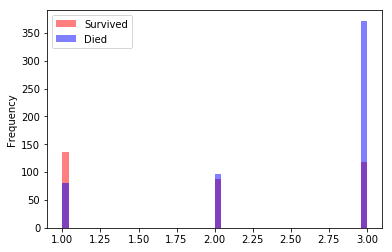

In [20]:
survived["Pclass"].plot.hist(alpha=0.5,color='red',bins=50)
died["Pclass"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [21]:
survived['Pclass'].describe()

count    342.000000
mean       1.950292
std        0.863321
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [22]:
survived['SibSp'].describe()

count    342.000000
mean       0.473684
std        0.708688
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: SibSp, dtype: float64

In [23]:
# Classification template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

def process_age(df, cut_points, label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["AgeCategories"] = pd.cut(df["Age"], cut_points, labels=label_names)

    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

In [24]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Missing
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Infant
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teenager


In [25]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]

In [26]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategories,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Missing,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Infant,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young Adult,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teenager,1


In [45]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]

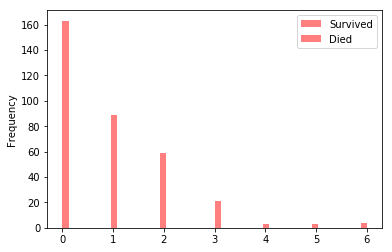

In [33]:
survived["FamilySize"].plot.hist(alpha=0.5,color='red',bins=50)

plt.legend(['Survived','Died'])
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
train["SexCategory"] = labelencoder.fit_transform(train["Sex"])

In [43]:
train["EmbarkedCategory"] = labelencoder.fit_transform(train["Embarked"].astype(str))

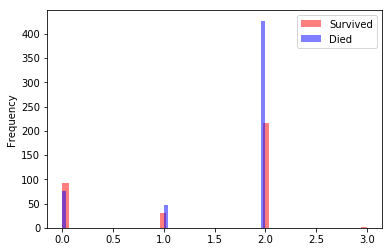

In [46]:
survived["EmbarkedCategory"].plot.hist(alpha=0.5,color='red',bins=50)
died["EmbarkedCategory"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

def process_age(df, cut_points, label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["AgeCategory"] = pd.cut(df["Age"], cut_points, labels=label_names)

    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)


# Family size does not seem to have any significant influence on the survival rate.
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]


# Encoding 
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder = LabelEncoder()
# train["SexCategory"] = labelencoder.fit_transform(train["Sex"])
# test["SexCategory"] = labelencoder.fit_transform(test["Sex"])
# 
# # There seems so be some correlation with embarked column as well.
# train["EmbarkedCategory"] = labelencoder.fit_transform(train["Embarked"].astype(str))
# test["EmbarkedCategory"] = labelencoder.fit_transform(test["Embarked"].astype(str))

def add_encoded_columns(df, column):
    dummies = pd.get_dummies(df[column], prefix = column) 
    df = pd.concat([df, dummies], axis = 1)

    return df

categorical_features = ["AgeCategory", "Sex", "Embarked"]

for feature in categorical_features:
    train = add_encoded_columns(train, feature)
    test = add_encoded_columns(test, feature)


In [68]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,AgeCategory_Child,AgeCategory_Teenager,AgeCategory_Young Adult,AgeCategory_Adult,AgeCategory_Senior,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,...,0,0,0,0,0,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,0,1,0,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,0,0,0,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,1,0,0,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,1,0,0,0,1,0,1,0,0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Importing the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Age categories.
def process_age(df, cut_points, label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["AgeCategory"] = pd.cut(df["Age"], cut_points, labels=label_names)

    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "YoungAdult", "Adult", "Senior"]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

# Feature engineering
## Family size.
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

## Title
def titles_in_name(name: str, titles: list):
    for title in titles:
        if title in name:
            return title
    return np.nan

title_list=["Mrs", "Mr", "Master", "Miss", "Major", "Rev",
            "Dr", "Ms", "Mlle","Col", "Capt", "Mme", "Countess",
            "Don", "Jonkheer"]
train["Title"] = train["Name"].map(lambda x: titles_in_name(x, title_list))
test["Title"] = test["Name"].map(lambda x: titles_in_name(x, title_list))

def categorize_titles(person):
    title = person["Title"]

    if title in ["Don", "Major", "Capt", "Jonkheer", "Rev", "Col"]:
        return "Mr"
    elif title in ["Countess", "Mme"]:
        return "Mrs"
    elif title in ["Mlle", "Ms"]:
        return "Miss"
    elif title in ["Dr"]:
        if person["Sex"] == "Male":
            return "Mr"
        else:
            return "Mrs"
    else:
        return title

train["Title"] = train.apply(categorize_titles, axis=1)
test["Title"] = test.apply(categorize_titles, axis=1)

# Encode categorical values
def add_encoded_columns(df, column):
    dummies = pd.get_dummies(df[column], prefix = column)
    df = pd.concat([df, dummies], axis = 1)

    return df

categorical_features = ["AgeCategory", "Sex", "Embarked", "Pclass", "Title"]

for feature in categorical_features:
    train = add_encoded_columns(train, feature)
    test = add_encoded_columns(test, feature)

# Make sure there are no missing values
train["Fare"] = train["Fare"].fillna((train["Fare"].mean()))
test["Fare"] = test["Fare"].fillna((test["Fare"].mean()))

# Prepare train/test set.
columns = ["Fare", "AgeCategory_Child", "AgeCategory_Teenager", "AgeCategory_YoungAdult", "AgeCategory_Adult", "AgeCategory_Senior", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3", "FamilySize", "Title_Mr", "Title_Mrs", "Title_Miss", "Title_Master"]
X_all = train[columns]
y_all = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 0)

# Prepare classifiers.
classifiers = {
    "Logistic Regression": LogisticRegression(random_state = 0, solver="lbfgs", max_iter = 10000),
    "KNN": KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2),
    "SVM": SVC(kernel = "linear", random_state = 0),
    "Kernel SVM": SVC(kernel = "rbf", random_state = 0),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion = "entropy", random_state = 0),
    "Random Forest": RandomForestClassifier(criterion = "entropy", n_estimators = 100, random_state = 0),
    "Gradient Boost": GradientBoostingClassifier()
}

holdout = test
holdout_predictions = {}

best_accuracy = 0
best_model = None

# Fit, predict and output.
for type, classifier in classifiers.items():
    print(f"\n--- {type} ---")
    scores = cross_val_score(classifier, X_all, y_all, cv = 10)
    accuracy = np.mean(scores)
    min = np.min(scores)
    max = np.max(scores)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = (type, classifier)

    print(f"\nAccuracy: {accuracy}\nMin: {min}\nMax: {max}\n")
    print(f"Fitting on all data, predicting test data...\n")

    classifier.fit(X_all, y_all)
    holdout_predictions[type] = classifier.predict(holdout[columns])

    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                     "Survived": holdout_predictions[type]}

    submission = pd.DataFrame(submission_df)
    submission.to_csv(f"predictions/titanic_{type}.csv", index=False)

print(f"\n...creating models and calculating predictions done.")

print(f"\n\nSaving best model for later use:")
print(f"\n{best_model[0]}")

pickle.dump(
    best_model[1],
    open(f"model/{best_model[0].lower().replace(' ', '_')}_classifier.model",
    "wb")
)



--- Logistic Regression ---

Accuracy: 0.823854556803995
Min: 0.7752808988764045
Max: 0.875

Fitting on all data, predicting test data...


--- KNN ---

Accuracy: 0.78914708886619
Min: 0.7191011235955056
Max: 0.8539325842696629

Fitting on all data, predicting test data...


--- SVM ---

Accuracy: 0.817087163772557
Min: 0.7752808988764045
Max: 0.8764044943820225

Fitting on all data, predicting test data...


--- Kernel SVM ---


/usr/local/var/pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/var/pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/var/pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/var/p


Accuracy: 0.7969495516967428
Min: 0.7640449438202247
Max: 0.8295454545454546

Fitting on all data, predicting test data...


--- Gaussian Naive Bayes ---

Accuracy: 0.7901322210872774
Min: 0.7415730337078652
Max: 0.8539325842696629

Fitting on all data, predicting test data...


--- Decision Tree ---


/usr/local/var/pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Accuracy: 0.8081361366473725
Min: 0.7191011235955056
Max: 0.8522727272727273

Fitting on all data, predicting test data...


--- Random Forest ---

Accuracy: 0.8014189649302009
Min: 0.7191011235955056
Max: 0.8876404494382022

Fitting on all data, predicting test data...


--- Gradient Boost ---

Accuracy: 0.8384232777210304
Min: 0.7752808988764045
Max: 0.8876404494382022

Fitting on all data, predicting test data...


...creating models and calculating predictions done.


Saving best model for later use:

Gradient Boost
